<a href="https://colab.research.google.com/github/amandabenjamin/Food_Sales_Predictions/blob/main/Food_Sales_Predictions_(Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(prior to part 5, Let's get the data in so we can start the project)

**Remember, the goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.**

In [124]:
from google.colab import drive #accessing drive (and data) from google colab
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [125]:
#import relevant libaries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [126]:
#assign data location to variable named 'filename'
filename = '/content/drive/MyDrive/Coding Dojo/02 Week 2: Pandas for Data Science/DATA /sales_predictions.csv' 

df = pd.read_csv(filename)#import the data into dataframe (df)
df.head() #take a look at the dataframe (top 5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [127]:
# 'Item_Fat_Content' (repeates (i.e. missnamed) need to be fixed)

fat_dict = {'LF':'Low Fat','low fat': 'Low Fat', 'reg':'Regular'} #create a dict to replace redundant fat categories
df['Item_Fat_Content'].replace(fat_dict, inplace = True) #replace Item fat conent variable with dictionary 

df['Item_Fat_Content'].value_counts() #check that it worked 


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Project 1, Part 5

Objective of this portion of the project is to: 

*   Return to the original dataset (avoid data leakage)
*   Help the retailer by using machine learning to make predictions about future sales based on the data provided.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**The following features are Numerical:**
*   Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, and  Item_Outlet_Sales

**The following features are Ordinal:**
*   Outlet_Size and Oulet_Location_Type

**The following features are Nominal:**
*   Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, and Outlet_Type

In [129]:
#lets convert ordinal features into numerical data
df['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2}, inplace=True)
df['Outlet_Location_Type'].replace({'Tier 1':0, 'Tier 2':1, 'Tier 3':2}, inplace=True)

df.head() #check dictionary replacement worked


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,0,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,2,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,0,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,2,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,2,Supermarket Type1,994.7052


**Identify the target (y) and features (X)**

In [130]:
y = df['Item_Outlet_Sales'] #Identify the target and assign it to variable (y) 
X = df.drop(columns = ['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']) #assign features to variable (X) (remove 'unique' features to help reduce overfitting)

**Perform a train test split**

In [131]:
#train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #assign random_state to 42 for reproduceability

**Create a pre processing pipeline to prepare the dataset for Machine Learning**

In [132]:
#Impute any missing values
freq_imputer = SimpleImputer(strategy='most_frequent') # frequency imputer for categorical columns missing data
mean_imputer = SimpleImputer(strategy='mean') #mean imputer for numeric columns missing data

In [133]:
#One-hot encode the nominal features 
cat_selector = make_column_selector(dtype_include='object') #select only the categorical variables
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False) #initialize onehotencoder

#Scale the numeric columns
num_selector = make_column_selector(dtype_include='number') #select only the numerical variables 
scaler = StandardScaler() #initialize standard scaler

In [134]:
#preprocessing steps: 

categorical_pipe = make_pipeline(freq_imputer, ohe) #categorial pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler) #numerical pipeline

category_tuple = (categorical_pipe, cat_selector) #make a tuple to combine categorical pipeline with cat. data
number_tuple = (numeric_pipe, num_selector) #make a tuple to combine numeric pipeline with numeric data

preprocessor = make_column_transformer(number_tuple, category_tuple,remainder = 'passthrough') # ColumnTransformer with both pipelines at one time

preprocessor.fit(X_train) #fit only to training data 

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff46a697810>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff46a697f10>)])

In [135]:
#transform data 
X_train_processed = preprocessor.transform(X_train) #transform training data
X_test_processed = preprocessor.transform(X_test) #transform testing data (which is not fit)

In [136]:
X_train_df = pd.DataFrame(X_train_processed) #convert processed training data to a dataframe
X_train_df.head() #take a look at the dataframe

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.817249,-0.712775,1.828109,1.327849,0.407785,1.084948,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,1.327849,0.407785,1.084948,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.136187,0.407785,-1.384777,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,0.732018,-1.291630,-0.149914,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,0.493686,0.000000,-0.149914,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Project 1, Final

Task 1: Build a linear regression model to predict sales

* Build a linear regression model.
* Evaluate the performance of your model based on r^2.
* Evaluate the performance of your model based on rmse

In [137]:
from sklearn.linear_model import LinearRegression #import needed libary

reg = LinearRegression() # Make a linear regression instance

In [138]:
reg.fit(X_train_processed,y_train); #train the model 

In [139]:
#evaluate the performance of the linear regression model using R^2 (coeff. of determination)
train_score = reg.score(X_train_processed, y_train)
print(train_score)

test_score = reg.score(X_test_processed, y_test)
print(test_score)

0.5605641946335693
0.5658139226347666


In [140]:
#evaluate the performance of the linear regression model using RMSE (Root Mean Squared Error)

import numpy as np
from sklearn.metrics import mean_squared_error
 
train_preds = reg.predict(X_train_processed) #predictions of the train set
test_preds = reg.predict(X_test_processed) #predictions of the test set

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds)) #rmse of model performance on training data 
print(rmse_train)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds)) #rmse of model preformance on testing data
print(rmse_test)

1140.3906352495649
1094.49053268292


Task 2: Build a regression tree model to predict sales

* Build a simple regression tree model.
* Compare the performance of your model based on r^2.
* Compare the performance of your model based on rmse.  

In [141]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state = 42) #making an instance of the model

In [142]:
dec_tree.fit(X_train_processed,y_train)

train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [143]:
# evaluate the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.20707527894579447


In [144]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds)) #rmse of model performance on training data 
print(rmse_train)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds)) #rmse of model preformance on testing data
print(rmse_test)

4.925864104892086e-15
1479.074472881261


what if we tried to fix the model to be less 'overfit'

In [148]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

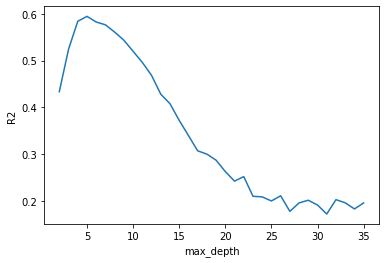

In [149]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');


In [150]:
dec_tree = DecisionTreeRegressor(max_depth = 6, random_state = 42) #making an instance of the model

dec_tree.fit(X_train_processed,y_train)

train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.6150717341872132
0.5825869854392531


In [151]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds)) #rmse of model performance on training data 
print(rmse_train)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds)) #rmse of model preformance on testing data
print(rmse_test)

1067.3228902694664
1073.1416620409484


Which model do you choose to implement? 

I would implement the 'optimized' regression tree model over linear regression as it predicted item outlet sales on unobserved data (test data) slighly better (as determined with R^2 and RMSE) than linear regression. Although not significantly better/higher, the optimized regression tree produced a larger coefficient of determination (R^2) than the linear regression model at predicting item outlet sales given the provided features of the model on test data. We also see that our assesment of variance (via RMSE) for the 'optimized' regression tree model is lower than the RMSE value produced using linear regression.